## Лабораторная работа № 3
-----

Необходимо реализовать фильтр калмана по сигма точкам для приведенного задания.

**Задача:** найти положение робота в 1D пространстве, при этом используем данные с камеры, измеряя высоту отдаленных
ориентиров относительно горизонта.<br />
**Замечание!**<br />
1.) Сохраним ту же модель линейного движения, что и в исходном примере, и предположим, что мы знаем высоту ориентира и его положение в глобальной системе координат.<br />
2.) Поскольку наш датчик измеряет угол, наша модель измерения имеет нелинейную зависимость от положения движущегося объекта.


<img src="https://likerobotics.ru/images/task2.jpg" width="400"/>

### Исходные данные 
Состояние
$$
\mathbf{x}=\left[\begin{array}{c}
p \\
\frac{d p}{d t}=\dot{p}
\end{array}\right]
$$
вход управления  $\quad \mathbf{u}=a=\frac{d^{2} p}{d t^{2}}$
<br />

Модель движения
$$
\begin{aligned}
\mathbf{x}_{k} &=\mathbf{f}\left(\mathbf{x}_{k-1}, \mathbf{u}_{k-1}, \mathbf{w}_{k-1}\right) \\
&=\left[\begin{array}{cc}
1 & \Delta t \\
0 & 1
\end{array}\right] \mathbf{x}_{k-1}+\left[\begin{array}{c}
0 \\
\Delta t
\end{array}\right] \mathbf{u}_{k-1}+\mathbf{w}_{k-1} \\
v_{k} & \sim \mathscr{N}(0,0.01) \quad \mathbf{w}_{k} \sim \mathscr{N}\left(\mathbf{0},(0.1) \mathbf{1}_{2 \times 2}\right)
\end{aligned}
$$

Модель измерения
$$
\begin{aligned}
y_{k} &=\phi_{k}=h\left(p_{k}, v_{k}\right) \\
&=\tan ^{-1}\left(\frac{S}{D-p_{k}}\right)+v_{k}
\end{aligned}
$$

Необходимо найти положение объекта в момент
времени 𝒌 + 𝟏, при ∆𝒕 = 𝟎. 𝟓 сек

$$
\begin{array}{cl}
\hat{\mathbf{x}}_{0} \sim \mathscr{N}\left(\left[\begin{array}{l}
0 \\
5
\end{array}\right],\right. & \left.\left[\begin{array}{cc}
0.01 & 0 \\
0 & 1
\end{array}\right]\right) \\
u_{0}=-2\left[\mathrm{~m} / \mathrm{s}^{2}\right] & y_{1}=\pi / 6[\mathrm{rad}] \\
S=20[\mathrm{~m}] & D=40[\mathrm{~m}]
\end{array}
$$

Подключаем необходимые библиотеки

In [1]:
import numpy as np
from numpy.linalg import inv, cholesky
import matplotlib.pyplot as plt

Задаем исходные данные:


In [2]:
x_0 = np.array([[0],[5]])
P_0 = np.array([[0.01 , 0],
                [0, 1]]) #ковариация в моментв ремени 0
Q_0 = np.array([[0.1 , 0],
                [0, 0.1]]) #ковариация модели движения в моментв ремени 0
R_0 = 0.01 #ковариация модели измерения в моментв ремени 0
u_0 = -2
y_1 = np.pi/6
S = 20
D = 40
dt = 0.5

### Начнем с предсказания
Для этого нам понадобится наша модель движения.

In [3]:

def motion_iterate(dt, x_k, u_k):
    """
    example inputs:
    dt = 0.5
    x_k = 0
    u_k = -2
    """
    # motion model 
    x_matrix = np.array([[1, dt], [0, 1]])
    u_matrix = np.array([[0], [dt]])
    x_k = x_matrix.dot(x_k) + u_matrix*u_k
    return x_k

Вспомнинаем, для N мерного распределения нам необходимо взять N+1 сигма точек.

In [4]:
#разложение Холецкого для ковариационной матрицы
N = 2 # размерность распределения
ka = 3 - N # каппа, значнеие для нормального распределения
hol = cholesky(P_0) 
print(hol)
#сигма точки нужно найти
sigma_list = []
sigma_list.append(x_0)
### START CODE HERE ###


### END CODE HERE ###
print(sigma_list)

[[0.1 0. ]
 [0.  1. ]]
[array([[0],
       [5]])]


In [ ]:
# теперь пропускаем наши сигма точки через нелинейную функцию (модель движения)
# чтобы получить сигма  точки для момента времени k
sigma_predicted = np.zeros((len(sigma_list), 2, 1))
for i, sigma in enumerate(sigma_list):
    ### START CODE HERE ###

    
    ### END CODE HERE ###
    
print('Predicted sigma points: ', sigma_predicted)

Predicted  sigma points:  [[[0.]
  [0.]]]


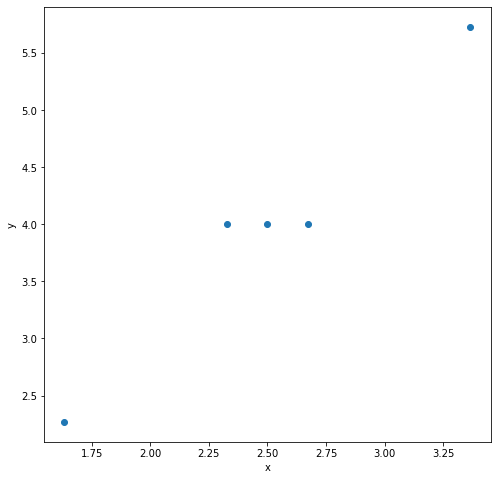

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(sigma_predicted[:,0], sigma_predicted[:,1])
# plt.scatter(mean_x, mean_y, color='red', s=300)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Рачет парметров выходных данных(предсказанных): среднего и ковариации.

In [ ]:
#коэффициенты надо посчитать
a_list = []

#инициализируем переменные для нового распределения
x_new = np.array([[0.0],[0.0]])
P_new = np.array([[0.0, 0.0],[0.0, 0.0]])
#среднее нового распределения
#...

#ковариация нового распределения
#...
print("The new mean = ", x_new)
print("The new covariance = ", P_new)

The new mean =  [[0.]
 [0.]]
The new covariance =  [[0. 0.]
 [0. 0.]]


### Теперь, зная наше предсказание, когда мы сделаем измерение, мы сможем сделать поправку
аналогичная процедура, только на этот раз с нелинейной моделью измерения
$$
\hat{\mathbf{y}}_{k}^{(i)}=\mathbf{h}_{k}\left(\check{\mathbf{x}}_{k}^{(i)}, \mathbf{0}\right) \quad i=0 \ldots 2 N
$$

In [ ]:
#разложение уже нашего P_new
hol = cholesky(P_new)
print(hol)

# аналогично находим сигма точки
cor_sigma_list = []
#...
print(cor_sigma_list)


[[0.50990195 0.        ]
 [0.98058068 0.19611614]]
[array([[2.5],
       [4. ]]), array([[3.38317609],
       [4.        ]]), array([[4.19841555],
       [4.33968311]]), array([[1.61682391],
       [4.        ]]), array([[0.80158445],
       [3.66031689]])]


In [ ]:
def measure_iterate(S,D,pk):
    """
    example inputs:
    S = 0.5
    D = 0
    p_k = -2
    """
    # motion model 
    y_k = np.arctan(S/(D-pk))
    return y_k

p_k = cor_sigma_list[0][0][0]
measure_iterate(S,D,p_k)

0.4899573262537283

In [ ]:
# аналогично прогоняем через модель
sigma_mes_list = []
#...
print(sigma_mes_list)

[]


Теперь считаем среднюю и ковариацию

In [ ]:
#среднее нового распределения

#..
print("The new mean = ", y_new)
print("The new covariance = ", P_y_new)

NameError: name 'y_new' is not defined

Считаем  кросс ковариацию, усилитель калмана и получаем финальное значение оценки


In [ ]:
P_xy = np.array([[0.0],[0.0]])
# ...
print(P_xy)

[[0.]
 [0.]]


In [ ]:
#усилитель
K = #...
print(K)

SyntaxError: invalid syntax (1051875600.py, line 2)

In [ ]:
# финальная оценка после корректировки
x_1 = x_new + K * (y_1 - y_new)
print(x_1)

[[2.52001527]
 [4.03626235]]
